In [1]:
%matplotlib inline
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

plt.style.use("seaborn-talk")

In [2]:
plt.style.use("seaborn")
#plt.style.available

In [3]:
# features_predictoras=features_x
# features_criterio=features_y
# predict_name=y_list[22] #17-25

params = {'n_estimators': 300,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

def feature_importance(features_predictoras,features_criterio,predict_name, view_plot=True):

    X_train, X_test, y_train, y_test = train_test_split(
        features_predictoras, 
        features_criterio[predict_name],
        test_size=0.25, 
        random_state=183)

    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)

    result = permutation_importance(reg, X_test, y_test, n_repeats=250,
                                    random_state=183, n_jobs=-1)
    if view_plot:
        sorted_idx = result.importances_mean.argsort()
        sorted_idx = sorted_idx[-15:]
        plt.figure(figsize=(8, 8))
        plt.boxplot(result.importances[sorted_idx].T,
                    vert=False, labels=np.array(features.columns)[sorted_idx])

        plt.title("Permutation Importance (test set) "+predict_name)

    return pd.DataFrame({predict_name+"_importance_mean":result.importances_mean}, index=features_x.columns)

In [4]:
# datos=pd.read_csv("datos_preprocesados.csv", index_col=0)
datos=pd.read_csv("datos_out_punts.csv", index_col=0)

In [5]:
datos.ebc_fecha=pd.to_datetime(datos.ebc_fecha)

In [6]:
y_list=["ebc_humor", "ebc_relax","ebc_energia", "ebc_levantado","ebc_interesantes",#4
        "ebc_nervioso","ebc_preocupacion","ebc_tranquilo", "ebc_desagradable", "ebc_inquieto", "ebc_temor",#10
        "escala_bienestar","escala_HADS",'centil_bienestar','centil_HADS', 'z_bienestar', 'z_HADS',#16
        "discret_bienestar","discret_HADS", 'flag_bienestar_z','flag_HADS_z', #20
        'flag_bienestar', 'flag_HADS',"flag_discret", "flag_z", #24
        'flag_warning']#25

In [7]:
datos_x=datos.drop(y_list,axis="columns")
datos_y=datos[y_list]
print(datos_x.columns)
print(datos_y.columns)

Index(['ebc_dirip', 'ebc_genero', 'ebc_anios', 'ebc_neducativo',
       'ebc_socupacional', 'ebc_hortrabajo', 'ebc_horestudio',
       'ebc_perdioempleo', 'ebc_expuestoempleo', 'ebc_epareja', 'ebc_ninos',
       'ebc_cuantosninos', 'ebc_adultos', 'ebc_cuantosadultos',
       'ebc_situacion_0', 'ebc_animo', 'ebc_agresivo', 'ebc_r_viven',
       'ebc_r_noviven', 'ebc_ruttrabajo', 'ebc_actfisica', 'ebc_actlectura',
       'ebc_actrecreacion', 'ebc_actotra', 'ebc_cual_rut', 'ebc_habilidad',
       'ebc_cualhabilidad', 'ebc_aprendio', 'ebc_queaprendio', 'ebc_bebia',
       'ebc_alcohol', 'ebc_fumaba', 'ebc_tabaco', 'ebc_consumiaspa', 'ebc_spa',
       'ebc_pal_futuro_1', 'ebc_pal_futuro_2', 'ebc_pal_futuro_3',
       'ebc_pal_futuro_4', 'ebc_pal_futuro_5', 'ebc_pal_futuro_6',
       'ebc_pal_futuro_7', 'ebc_susfinanzas', 'ebc_susfinanzas1',
       'ebc_sueducacion', 'ebc_sueducacion1', 'ebc_educashijos',
       'ebc_educashijos1', 'ebc_susalud', 'ebc_susalud1', 'ebc_sufamilia',
       'ebc_

In [8]:
features=pd.read_csv("features_normalized.csv", index_col=0)

In [9]:
features_x=features.drop(y_list,axis="columns")
features_y=features[y_list]
print(features_x.columns)
print(features_y.columns)

Index(['ebc_genero_Hombre', 'ebc_genero_Mujer', 'ebc_genero_Otro',
       'ebc_neducativo_postgrado', 'ebc_neducativo_primaria',
       'ebc_neducativo_secundaria', 'ebc_neducativo_universidad',
       'ebc_socupacional_Estudiante, no trabajo.',
       'ebc_socupacional_Estudio y trabajo.',
       'ebc_socupacional_Jubilación o pensión',
       'ebc_socupacional_No tengo empleo y no estoy buscando.',
       'ebc_socupacional_No tengo empleo, pero estoy buscando.',
       'ebc_socupacional_No trabajo por discapacidad.',
       'ebc_socupacional_Normalmente trabajo en casa.',
       'ebc_socupacional_Trabajo tiempo completo.',
       'ebc_socupacional_Trabajo tiempo parcial.', 'ebc_hortrabajo_0- 2 Horas',
       'ebc_hortrabajo_3 - 5 Horas', 'ebc_hortrabajo_5 - 8 Horas',
       'ebc_hortrabajo_8 - Más horas', 'ebc_horestudio_0- 2 Horas',
       'ebc_horestudio_3 - 5 Horas', 'ebc_horestudio_5 - 8 Horas',
       'ebc_horestudio_8 - Más horas', 'ebc_perdioempleo_Si',
       'ebc_perdioemple

In [10]:
# flag_bienestar=((datos.z_bienestar<-1)&(datos.discret_bienestar==1))*1
# flag_HADS=((datos.z_HADS>1)&(datos.discret_HADS==1))*1
# flag_warning=(flag_bienestar&flag_HADS)*1

# flag_bienestar_z=(datos.z_bienestar<-1)*1
# flag_HADS_z=(datos.z_HADS>1)*1
# flag_warning_z=(flag_bienestar_z&flag_HADS_z)*1

# flag_discret=((datos.discret_bienestar)&(datos.discret_HADS==1))*1

In [11]:
# pd.crosstab(index=flag_warning_z,columns=flag_discret, margins=True)

In [12]:
# datos_y=pd.concat([datos[y_list],
#                    pd.DataFrame({"flag_bienestar":flag_bienestar,
#                                  "flag_HADS":flag_HADS,
#                                  "flag_discret":flag_discret,
#                                  "flag_warning":flag_warning})], axis="columns")

# features_y=pd.concat([features[y_list],
#                       pd.DataFrame({"flag_bienestar":flag_bienestar,
#                                     "flag_HADS":flag_HADS,
#                                     "flag_discret":flag_discret,
#                                     "flag_warning":flag_warning})], axis="columns")

In [13]:
pairs_statests=pd.read_csv("pruebas_variables_test.csv", index_col=0)
pairs_statests.sample(15)

,var_1,var_1_tipo,prueba,var_2,var_2_tipo,p_val,relac
2161,ebc_pal_futuro_4,dicotomica,chisquare,ebc_deudas,dicotomica,2.719339e-03,si
2185,ebc_pal_futuro_4,dicotomica,Prueba T,z_HADS,numerica,1.212875e-01,no
1173,ebc_agresivo,likert,Prueba T,flag_HADS,dicotomica,6.183624e-10,si
2575,ebc_susamigos,likert,Prueba T,flag_z,dicotomica,8.121656e-07,si
63,ebc_genero,politomica,chisquare,ebc_situacion_3,dicotomica,3.094273e-01,no
540,ebc_perdioempleo,politomica,chisquare,flag_HADS_z,dicotomica,9.718417e-04,si
2648,ebc_supais,likert,Prueba T,flag_bienestar_z,dicotomica,1.114360e-05,si
1564,ebc_actotra,dicotomica,chisquare,ebc_pal_futuro_7,dicotomica,8.481011e-03,si
2353,ebc_susfinanzas,likert,Pearson,ebc_inquieto,likert,6.282032e-08,si
1417,ebc_actfisica,dicotomica,chisquare,discret_bienestar,dicotomica,1.817984e-14,si


In [14]:
var_name="ebc_epareja"
pairs_statests[(pairs_statests.relac=="si")&
               ((pairs_statests.var_1==var_name)|(pairs_statests.var_2==var_name))&
               (pairs_statests.var_1.isin(y_list)|pairs_statests.var_2.isin(y_list))].sort_values("p_val")

,var_1,var_1_tipo,prueba,var_2,var_2_tipo,p_val,relac
664,ebc_epareja,politomica,ANOVA,ebc_energia,likert,0.000034,si
666,ebc_epareja,politomica,ANOVA,ebc_interesantes,likert,0.000524,si
678,ebc_epareja,politomica,ANOVA,escala_bienestar,numerica,0.000723,si
683,ebc_epareja,politomica,ANOVA,z_bienestar,numerica,0.000805,si
682,ebc_epareja,politomica,ANOVA,centil_bienestar,numerica,0.002290,si
665,ebc_epareja,politomica,ANOVA,ebc_levantado,likert,0.005871,si
669,ebc_epareja,politomica,ANOVA,ebc_tranquilo,likert,0.007806,si
691,ebc_epareja,politomica,chisquare,flag_discret,dicotomica,0.012791,si
662,ebc_epareja,politomica,ANOVA,ebc_humor,likert,0.029910,si
671,ebc_epareja,politomica,ANOVA,ebc_inquieto,likert,0.040173,si


## Matriz de variables

In [15]:
variables_correlaciones=(features.corr().loc[features_x.columns,features_y.columns]).abs()

In [16]:
variables_correlaciones

,ebc_humor,ebc_relax,ebc_energia,ebc_levantado,ebc_interesantes,ebc_nervioso,ebc_preocupacion,ebc_tranquilo,ebc_desagradable,ebc_inquieto,...,z_HADS,discret_bienestar,discret_HADS,flag_bienestar_z,flag_HADS_z,flag_bienestar,flag_HADS,flag_discret,flag_z,flag_warning
ebc_genero_Hombre,0.076802,0.110454,0.126077,0.111096,0.058770,0.136055,0.099526,0.036591,0.083491,0.004021,...,0.096597,0.088254,0.076575,0.051413,0.035317,0.051413,0.035317,0.084455,0.030748,0.030748
ebc_genero_Mujer,0.070980,0.106517,0.123481,0.110921,0.059089,0.132839,0.099750,0.037064,0.082368,0.009157,...,0.093682,0.083181,0.075646,0.049014,0.036377,0.049014,0.036377,0.084403,0.031432,0.031432
ebc_genero_Otro,0.020081,0.010099,0.003490,0.005864,0.004845,0.005522,0.006867,0.004179,0.000211,0.021980,...,0.006593,0.016227,0.000623,0.007098,0.006591,0.007098,0.006591,0.004801,0.004725,0.004725
ebc_neducativo_postgrado,0.054599,0.084184,0.079401,0.068952,0.111061,0.056545,0.055211,0.052731,0.022376,0.062814,...,0.069769,0.113434,0.063748,0.047525,0.004491,0.047525,0.004491,0.084592,0.015975,0.015975
ebc_neducativo_primaria,0.029148,0.011405,0.041877,0.029968,0.023862,0.017178,0.022071,0.001410,0.002159,0.014031,...,0.004931,0.053828,0.010292,0.003083,0.016802,0.003083,0.016802,0.022670,0.011250,0.011250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ebc_susalud,0.340843,0.359936,0.355653,0.321582,0.281131,0.317909,0.302152,0.271838,0.265928,0.202700,...,0.351949,0.331640,0.252352,0.268953,0.245607,0.268953,0.245607,0.322717,0.212228,0.212228
ebc_sufamilia,0.261939,0.236813,0.238039,0.211286,0.244201,0.145824,0.161656,0.207475,0.155339,0.116234,...,0.193538,0.234348,0.138596,0.215714,0.109966,0.215714,0.109966,0.179965,0.143070,0.143070
ebc_susamigos,0.192797,0.189762,0.225736,0.150514,0.200073,0.158692,0.159351,0.120674,0.129523,0.120597,...,0.177973,0.175595,0.141547,0.174648,0.107744,0.174648,0.107744,0.167502,0.127363,0.127363
ebc_suciudad,0.144457,0.168932,0.183355,0.143357,0.144799,0.178570,0.172050,0.098611,0.132621,0.093667,...,0.179324,0.191115,0.143409,0.100213,0.124576,0.100213,0.124576,0.184532,0.119898,0.119898


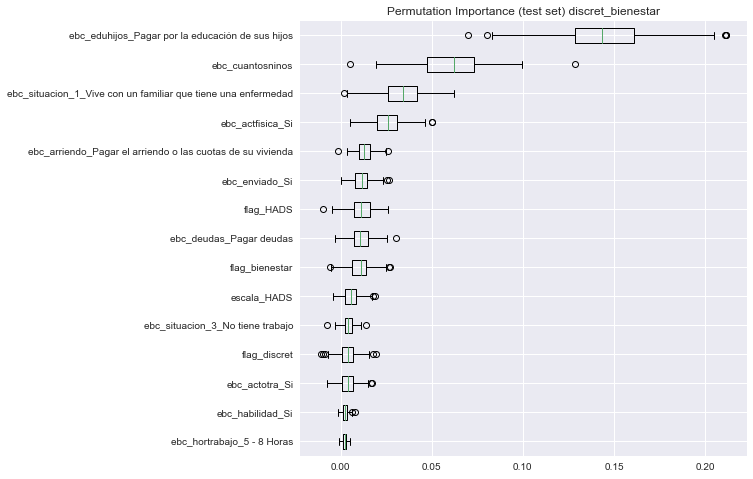

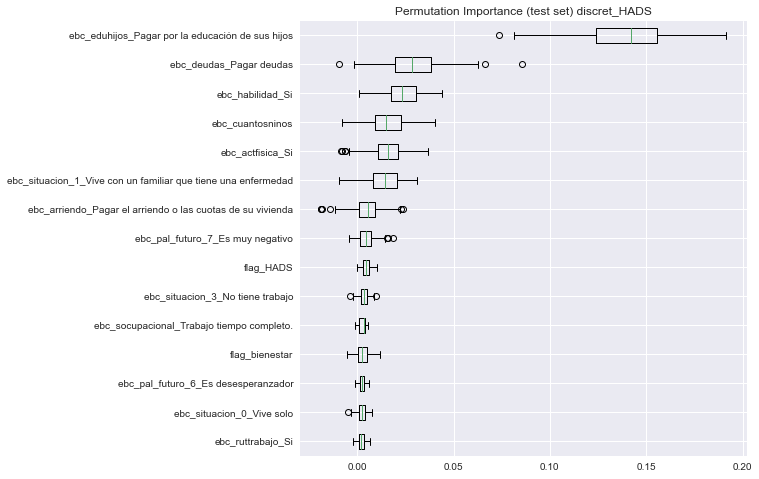

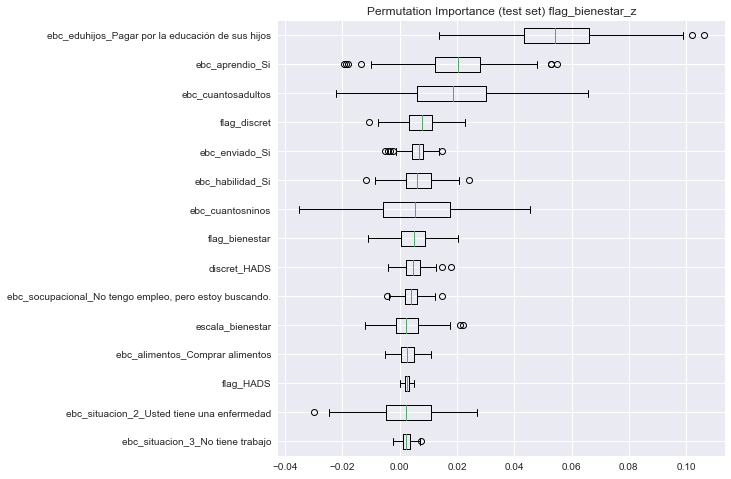

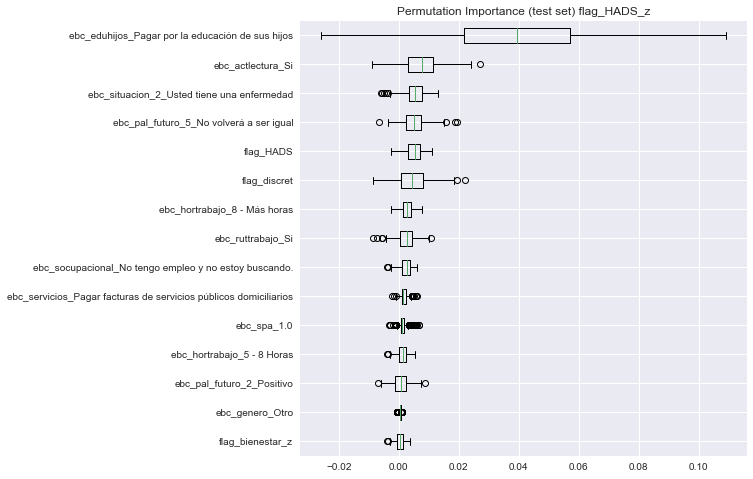

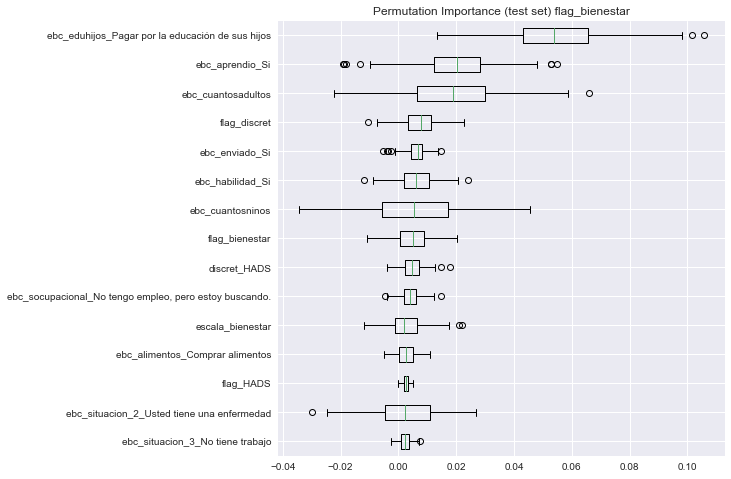

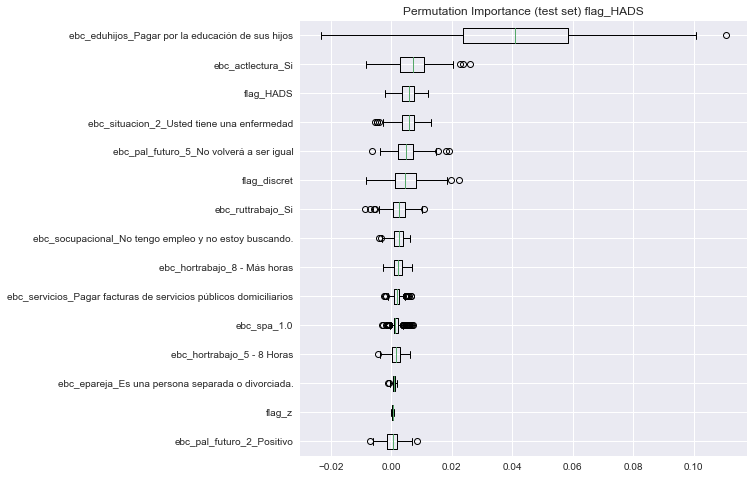

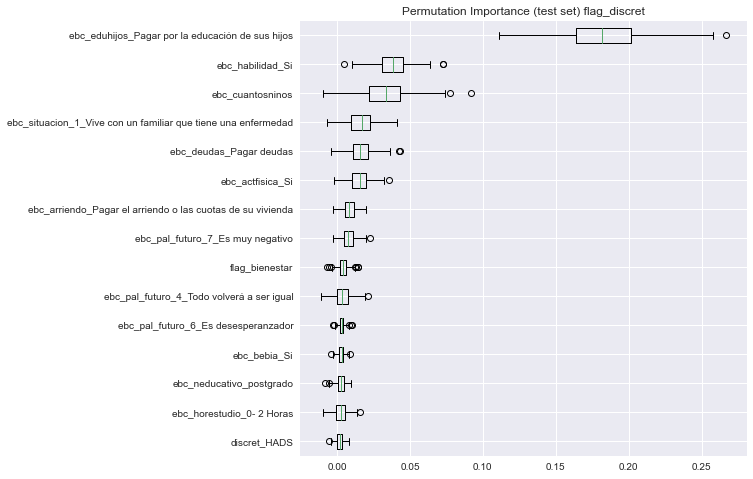

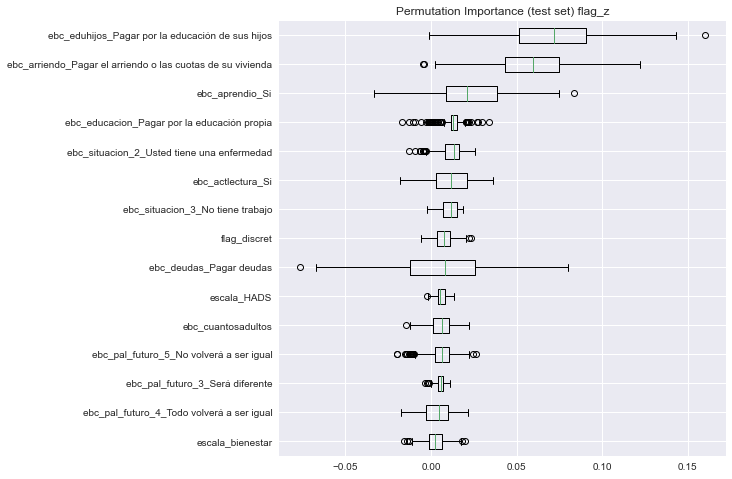

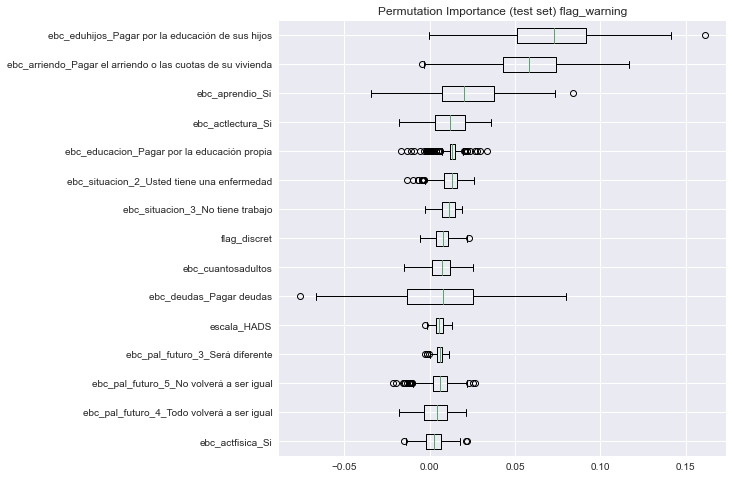

In [18]:
for i in range(17,26):
    variables_correlaciones=pd.concat([variables_correlaciones, feature_importance(features_x,features_y,y_list[i])], axis="columns")    

In [19]:
variables_correlaciones

,ebc_humor,ebc_relax,ebc_energia,ebc_levantado,ebc_interesantes,ebc_nervioso,ebc_preocupacion,ebc_tranquilo,ebc_desagradable,ebc_inquieto,...,flag_warning,discret_bienestar_importance_mean,discret_HADS_importance_mean,flag_bienestar_z_importance_mean,flag_HADS_z_importance_mean,flag_bienestar_importance_mean,flag_HADS_importance_mean,flag_discret_importance_mean,flag_z_importance_mean,flag_warning_importance_mean
ebc_genero_Hombre,0.076802,0.110454,0.126077,0.111096,0.058770,0.136055,0.099526,0.036591,0.083491,0.004021,...,0.030748,-0.000495,-0.000075,0.000792,-7.390613e-04,0.000685,2.763384e-04,-0.000037,-6.161737e-04,-7.578718e-04
ebc_genero_Mujer,0.070980,0.106517,0.123481,0.110921,0.059089,0.132839,0.099750,0.037064,0.082368,0.009157,...,0.031432,-0.000014,-0.000172,0.000387,-4.791310e-04,0.000577,-3.932994e-04,-0.000689,-9.379397e-04,-5.957564e-04
ebc_genero_Otro,0.020081,0.010099,0.003490,0.005864,0.004845,0.005522,0.006867,0.004179,0.000211,0.021980,...,0.004725,0.000000,-0.000253,-0.000120,4.203705e-04,-0.000121,3.492951e-04,0.000000,-1.945108e-03,-1.947331e-03
ebc_neducativo_postgrado,0.054599,0.084184,0.079401,0.068952,0.111061,0.056545,0.055211,0.052731,0.022376,0.062814,...,0.015975,-0.000972,0.000702,-0.000048,0.000000e+00,-0.000047,9.818519e-06,0.002703,2.261201e-04,2.276902e-04
ebc_neducativo_primaria,0.029148,0.011405,0.041877,0.029968,0.023862,0.017178,0.022071,0.001410,0.002159,0.014031,...,0.011250,0.000061,0.000112,0.000000,7.277421e-07,0.000000,5.253189e-07,0.000000,-3.079100e-07,-3.079100e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ebc_susalud,0.340843,0.359936,0.355653,0.321582,0.281131,0.317909,0.302152,0.271838,0.265928,0.202700,...,0.212228,0.060631,0.015623,0.005782,-2.672188e-03,0.005965,-3.021508e-03,0.033272,-6.934245e-03,-6.752932e-03
ebc_sufamilia,0.261939,0.236813,0.238039,0.211286,0.244201,0.145824,0.161656,0.207475,0.155339,0.116234,...,0.143070,0.001774,0.000655,0.018299,-2.355942e-03,0.018435,-1.760770e-03,-0.000196,5.832330e-03,6.725346e-03
ebc_susamigos,0.192797,0.189762,0.225736,0.150514,0.200073,0.158692,0.159351,0.120674,0.129523,0.120597,...,0.127363,0.001168,-0.000069,0.002696,-2.521502e-03,0.002687,-1.729375e-03,-0.000422,2.733488e-03,1.944154e-03
ebc_suciudad,0.144457,0.168932,0.183355,0.143357,0.144799,0.178570,0.172050,0.098611,0.132621,0.093667,...,0.119898,0.005726,-0.005038,-0.000458,-5.658501e-03,-0.000494,-5.643996e-03,0.000054,5.842747e-03,5.871555e-03


<AxesSubplot:xlabel='flag_discret', ylabel='flag_discret_importance_mean'>

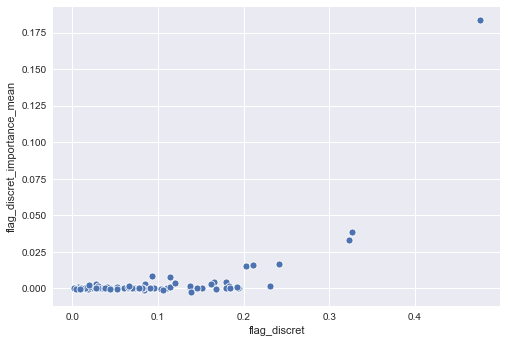

In [20]:
plt_values=variables_correlaciones.loc[:,variables_correlaciones.columns.str.contains(y_list[23], regex=True)]
sns.scatterplot(plt_values.iloc[:,0],plt_values.iloc[:,1])

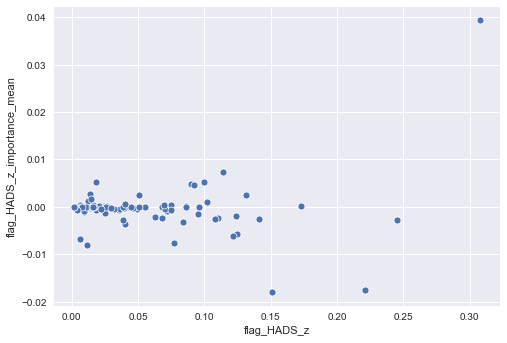

<AxesSubplot:xlabel='flag_HADS', ylabel='flag_HADS_importance_mean'>

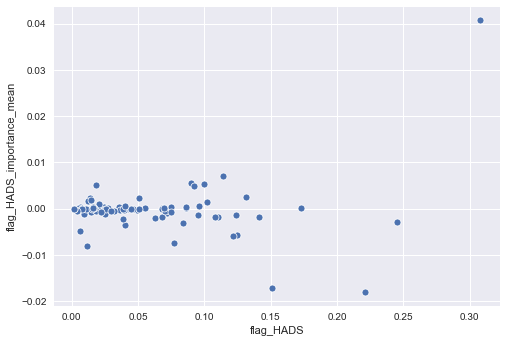

In [21]:
plt_values=variables_correlaciones.loc[:,variables_correlaciones.columns.str.contains(y_list[22], regex=True)]

sns.scatterplot(plt_values.iloc[:,0],plt_values.iloc[:,2])
plt.show()
sns.scatterplot(plt_values.iloc[:,1],plt_values.iloc[:,3])

In [22]:
salidas=[]
for var_criterio in features_y.columns:
    X_train, X_test, y_train, y_test = train_test_split(
        features_x, 
        features_y[var_criterio],
        test_size=0.25, 
        random_state=183)
    if len(features_y[var_criterio].value_counts())>2:
        reg = LinearRegression().fit(X_train, y_train)
        test_score=reg.score(X_test, y_test)
        salidas.append([var_criterio,"lineal","r2",test_score])
#         print (var_criterio,"lineal","r2",test_score)
    else:
        clf = LogisticRegression(random_state=183,max_iter=10000).fit(X_train, y_train)
        test_score=clf.score(X_test, y_test)
        salidas.append([var_criterio,"logística","mean_accuracy",test_score])
#         print (var_criterio,"logística","mean_accuracy",test_score)
    
    # [len(features_y[ft].value_counts())>2 for ft in features_y]

In [23]:
pd.DataFrame(salidas, columns=["Criterio", "Tipo_Regresión", "Métrica", "valor"])

,Criterio,Tipo_Regresión,Métrica,valor
0,ebc_humor,lineal,r2,0.301563
1,ebc_relax,lineal,r2,0.220501
2,ebc_energia,lineal,r2,0.283712
3,ebc_levantado,lineal,r2,0.262915
4,ebc_interesantes,lineal,r2,0.259225
5,ebc_nervioso,lineal,r2,0.234416
6,ebc_preocupacion,lineal,r2,0.288162
7,ebc_tranquilo,lineal,r2,0.060340
8,ebc_desagradable,lineal,r2,0.145190
9,ebc_inquieto,lineal,r2,0.047530


In [24]:
for var_criterio in features_y.columns:
    X_train, X_test, y_train, y_test = train_test_split(
        features_x, 
        features_y[var_criterio],
        test_size=0.25, 
        random_state=183)

    reg = LinearRegression().fit(X_train, y_train)
    test_score=reg.score(X_test, y_test)
    salidas.append([var_criterio,"lineal","r2",test_score])
    print (var_criterio,"r2",test_score)

ebc_humor r2 0.3015632501786625
ebc_relax r2 0.2205009883169412
ebc_energia r2 0.2837115217352326
ebc_levantado r2 0.26291507692446103
ebc_interesantes r2 0.25922507842542375
ebc_nervioso r2 0.23441625112930886
ebc_preocupacion r2 0.288162174492946
ebc_tranquilo r2 0.06034027222572247
ebc_desagradable r2 0.14519038246621596
ebc_inquieto r2 0.047529666244138236
ebc_temor r2 0.2452114741785042
escala_bienestar r2 0.4271161661137808
escala_HADS r2 0.3295888975386241
centil_bienestar r2 0.4295825357364912
centil_HADS r2 0.3281966493031425
z_bienestar r2 0.4274942177655132
z_HADS r2 0.32990863211727783
discret_bienestar r2 0.2156590489272282
discret_HADS r2 0.2043779881795248
flag_bienestar_z r2 0.11833330258931207
flag_HADS_z r2 0.021892601995802563
flag_bienestar r2 0.11833330258931207
flag_HADS r2 0.021892601995802563
flag_discret r2 0.2468822790290517
flag_z r2 -0.01813196656853089
flag_warning r2 -0.01813196656853089


* Incluir desempeño del boosting para las regresiones y contrastarlos